In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score


with open('../data/X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('../data/Y.pkl', 'rb') as file:
    y = pickle.load(file)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


In [9]:
from sklearn.model_selection import GridSearchCV

classificator = KNeighborsClassifier()
n_list = list(range(1, 10))

param_grid = {'n_neighbors': n_list, 'p': [1, 2]}
#minkowski metrics for p 1 metric = manhattan, for p 2  metric = euclidan

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

#

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

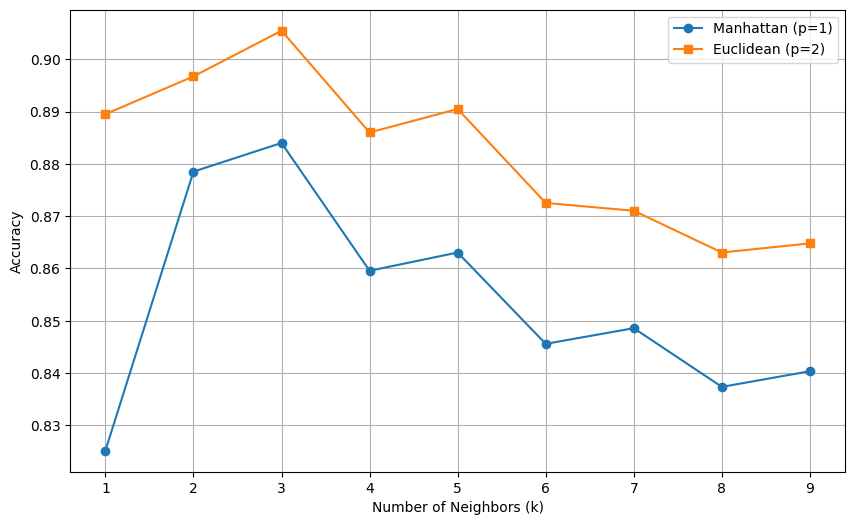

In [15]:
results = grid_search.cv_results_

mean_test_scores = results['mean_test_score']
params = results['params']

scores_p1 = [mean_test_scores[i] for i in range(len(params)) if params[i]['p'] == 1]
scores_p2 = [mean_test_scores[i] for i in range(len(params)) if params[i]['p'] == 2]

plt.figure(figsize=(10, 6))
plt.plot(n_list, scores_p1, label='Manhattan (p=1)', marker='o')
plt.plot(n_list, scores_p2, label='Euclidean (p=2)', marker='s')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('../results/knn_accuracy_plot.png', format='png')
plt.show()

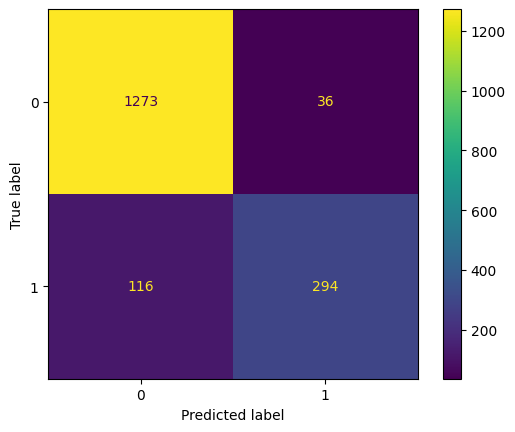

In [11]:

classificator = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], p=grid_search.best_params_['p'])
classificator.fit(X_train, y_train)

predict = classificator.predict(X_test.toarray())

cm = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.savefig('../results/confusion_matrix_knn.png', format='png')

In [14]:
accuracy = accuracy_score(y_test, predict)
print(f"Accuracy_score: {accuracy:.4f}")
cv_accuracy = cross_val_score(KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], p=grid_search.best_params_['p']), X.toarray(), y, cv=5, scoring="accuracy")
print(f'Cross-Validation mean accuracy score: {np.mean(cv_accuracy)}')

precision = precision_score(y_test, predict)
print(f'Precision {precision:.4f}')
cv_precision = cross_val_score(KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], p=grid_search.best_params_['p']), X.toarray(), y, cv=5, scoring="precision")
print(f'Cross-Validation mean precision score: {np.mean(cv_precision)}')


recall = recall_score(y_test, predict)
print(f'Recall: {recall:.4f}')
cv_recall = cross_val_score(KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], p=grid_search.best_params_['p']), X.toarray(), y, cv=5, scoring="recall")
print(f'Cross-Validation mean recall score: {np.mean(cv_recall)}')

f1 = f1_score(y_test, predict)
print(f'F1: {f1:.4f}')
cv_f1 = cross_val_score(KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], p=grid_search.best_params_['p']), X.toarray(), y, cv=5, scoring="f1")
print(f'Cross-Validation mean F1 score: {np.mean(cv_f1)}')

Accuracy_score: 0.9116
Cross-Validation mean accuracy score: 0.9141071659922113
Precision 0.8909
Cross-Validation mean precision score: 0.9285093616105007
Recall: 0.7171
Cross-Validation mean recall score: 0.6948881757909804
F1: 0.7946
Cross-Validation mean F1 score: 0.7940113803700071
